<a href="https://colab.research.google.com/github/FGalvao77/Solucoes-para-tratar-dados-desbalanceados/blob/main/Solu%C3%A7%C3%B5es_para_tratar_dados_desbalanceados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Soluções para tratar dados desbalanceados** 

---



In [18]:
# @title
# suprimir os warnings
# from warnings import simplefilter
# simplefilter(action='ignore', category=FutureWarning)

import warnings
warnings.filterwarnings('ignore')

!pip install -q scikit-plot --upgrade

## Introdução

A classe desbalanceada ocorre quando temos um conjunto de dados que possui muitos exemplos de uma classe e poucos exemplos da outra classe.

Exemplo:

![](https://minerandodados.com.br/wp-content/uploads/2020/02/image-17-669x502.png)


Saber como tratar `dados desbalanceados` é fundamental na aplicação de modelos de _Machine Learning_ e, conhecer e dominar alguma(s) técnica(s) é requesito para todo **Data Scientist**. 

Esse tipo de abordagem é essencial para construção de modelos de classificação, pois o desbalanceamentos entre classes, muitas vezes pode "condicionar" uma má inferência ao modelo, ou seja, o modelo irar "responder" muito bem para classe majoritária e, para classe minoritária apresentará um desempenho inferior. E isso, com certeza pode impactar diretamente no seu projeto de _Ciência de Dados_.

Teoricamente, um conjunto de dados que possua qualquer classe com mais de `50%` das entradas já é considerado desbalanceado. Pórem, na _vida real_ podemos encontrar situaçoes extremas e proporções maiores que 99:1.

Pra cada técnica existe os `prós` e `contras` e, iremos explorar algumas técnicas mais utilizadas.

## Vantagens e desvantagens de cada técnica

[O Teorema *No Free Lunch*](https://www.kdnuggets.com/2019/09/no-free-lunch-data-science.html) diz que não existe uma técnica perfeita e única, apenas com algumas vantagens e desvantagens entre uma e outra. Cada escolha é uma renúncia, isso é *Data Science*. 

Quando você opta por uma abordagem, tem que estar ciente das limitações e implicações nos seus resultados e, isso tem que ser explicitamente exposto para todos os *stakeholders*.





### Métodos para lidar com dados desbalanceados

Há diversas maneiras para atacar o problema de dados desbalanceados, que envolvem desde a construção de algoritmos específicos até  a aplicação de algoritmos mais avançados como *Recognition-based Learning* e *Cost-sensitive Learning*. 

No entanto, uma outra abordagem bem mais simples tem sido amplamente usada (com ótimos resultados), a abordagem *sampling*.

*Sampling* é um pré-processamento que visa minimizar as discrepâncias entre as classes por meio de uma reamostragem do *dataset* original. Para gerar um conjunto balanceado, são usadas normalmente as seguintes técnicas:

- *Undersampling*: reduz de forma aleatória os exemplos da classe majoritária. Essa técnica extrai um subconjunto aleatório da classe majoritária, preservando as características da classe minoritária, sendo ideal para situações onde você tem grandes volumes de dados. Apesar de reduzir o tempo computacional e de armazenamento, esta técnica descarta informações da classe majoritária, o que pode levar a uma performance inferior nas predições dela.

- *NearMiss*: é um algoritmo de undersampling que consiste em reduzir de forma aleatória os exemplos da classe majoritária, porém ele seleciona os exemplos com base na distância. Quando instâncias das duas classes estão muito próximas umas das outras, removemos as instâncias da classe majoritária para termos uma maior separabilidade entre as classes.

- *Oversampling*: replica dados aleatórios da classe minoritária. Como estamos duplicando os dados já existentes este método está propício a dar overfitting. A geração de novas entradas pode ser feita aleatoriamente com o auxílio de técnicas de clustering ou sinteticamente. A vantagem é que nenhuma informação é descartada, porém o custo computacional será elevado e você irá deteriorar a performance do algoritmo para as classes minoritárias.

- *Smote*: consiste em gerar dados sintéticos (não duplicados) da classe minoritária a partir de vizinhos. Ele calcula quais são os vizinhos mais próximos e as características desses vizinhos para criar novos dados. Se o número de dados gerados for muito grande podemos ter um overfiting.

- *Engenharia de features*: gera novas features dando maior robustez ao modelo e diminuindo o viés da classe majoritária.


Caso tenha curiosidade em conhecer mais e se aprofundar no assunto, [leia este artigo científico](https://ro.uow.edu.au/cgi/viewcontent.cgi?referer=https://www.google.com/&httpsredir=1&article=1806&context=infopapers).

## Aplicação prática

Para atividade irei utilizar um conjunto de dados públicos de transações financeiras disponibilizados por empresas de cartões de crédito disponibilizado no [Kaggle](https://www.kaggle.com/mlg-ulb/creditcardfraud).

Como é característico desse tipo de problema, as instâncias possuem distribuições bem discrepantes entre as classes `normal` (0) e `fraude` (1).

In [1]:
# importando o conjunto de dados através de uma url
!wget https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1

--2022-02-10 22:31:19--  https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/b44o3t3ehmnx2b7/creditcard.csv [following]
--2022-02-10 22:31:19--  https://www.dropbox.com/s/dl/b44o3t3ehmnx2b7/creditcard.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucc7e11addfd5ee9e15940dc9fe7.dl.dropboxusercontent.com/cd/0/get/BfeYdikxua6djp7ZHfjgMSgmAsbiKNv12yxoZoRkYUXC4SdMXhdq83qTPb3cc-87_6qNNx94-I-323KkWYfCNlkbw_KPZNuMVcrtEmTdh6FCwvT4CKS-ZCqYW-QD1vs-sCblAjdQuWn4L4nIG8N7m7Gr/file?dl=1# [following]
--2022-02-10 22:31:19--  https://ucc7e11addfd5ee9e15940dc9fe7.dl.dropboxusercontent.com/cd/0/get/BfeYdikxua6djp7ZHfjgMSgmAsbiKNv12yxoZoRkYUXC4SdMXhdq83qTPb3cc-87_6qNNx94-I-323KkWY

In [2]:
# visualizando o diretório principal do notebook
%ls

'creditcard.csv?dl=1'   sample_data/


In [3]:
# realizando a leitura do conjunto de dados
!head creditcard.csv?dl=1

"Time","V1","V2","V3","V4","V5","V6","V7","V8","V9","V10","V11","V12","V13","V14","V15","V16","V17","V18","V19","V20","V21","V22","V23","V24","V25","V26","V27","V28","Amount","Class"
0,-1.3598071336738,-0.0727811733098497,2.53634673796914,1.37815522427443,-0.338320769942518,0.462387777762292,0.239598554061257,0.0986979012610507,0.363786969611213,0.0907941719789316,-0.551599533260813,-0.617800855762348,-0.991389847235408,-0.311169353699879,1.46817697209427,-0.470400525259478,0.207971241929242,0.0257905801985591,0.403992960255733,0.251412098239705,-0.018306777944153,0.277837575558899,-0.110473910188767,0.0669280749146731,0.128539358273528,-0.189114843888824,0.133558376740387,-0.0210530534538215,149.62,"0"
0,1.19185711131486,0.26615071205963,0.16648011335321,0.448154078460911,0.0600176492822243,-0.0823608088155687,-0.0788029833323113,0.0851016549148104,-0.255425128109186,-0.166974414004614,1.61272666105479,1.06523531137287,0.48909501589608,-0.143772296441519,0.635558093258208,0.4639170410

In [4]:
# importando a biblioteca para manipulação e análise de dados
import pandas as pd

In [5]:
# instanciando a url do conjunto de dados no objeto "file_path"
file_path = 'https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1'

In [6]:
# com o pandas e sua função ".read_csv()" realizando o carregamento e instanciando as informaçãoes do "file_path" no objeto "df"
df = pd.read_csv(file_path)

# visualizando as 5 primeiras observações
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
# visualizando a distribuição das instâncias nas classes do atributo alvo
print(
    df['Class'].value_counts(),
    df['Class'].value_counts(normalize=True) * 100,
    sep='\n\n'
)

0    284315
1       492
Name: Class, dtype: int64

0    99.827251
1     0.172749
Name: Class, dtype: float64


> Perceba que, temos um desbalanceamento enorme entre as classes. Onde a classe `0` tem cerca de ~99.8% dos dados observados.

Com gráfico de barras vamos visualizar graficamente o desbalanceamento!

In [8]:
# importando as bibliotecas para visualização gráfica
import matplotlib.pyplot as plt
import seaborn as sns

# configurando o ambiente de exibição
%matplotlib inline
sns.set_theme(style='ticks', palette='pastel')

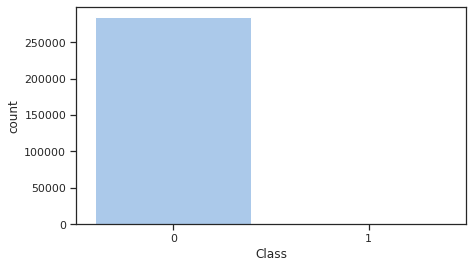

In [9]:
# plotando gráfico de barras da distribuição das classes do atributo alvo
plt.figure(figsize=(7,4))
sns.countplot(data=df, x='Class');

De início não vamos realizar nenhum tratamento, iremos aplicar um modelo de `Regressão Logística` e, por fim usar algumas métricas para avaliar a performance do modelo.

In [10]:
# importando a função para aplicação do modelo
from sklearn.linear_model import LogisticRegression

# função para realizar o particionamento dos dados
from sklearn.model_selection import train_test_split

# funções de métricas para avaliar a performance do modelo
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, accuracy_score

In [11]:
# instanciando as variáveis explicativas (X) e a resposta (y)
X, y = df.drop('Class', axis=1), df['Class']

In [12]:
# visualizando as 5 primeiras observações da variável X
X[:5]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [13]:
# visualizando as 5 primeiras observações da variável y
y[:5]

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [14]:
# instanciando os dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, shuffle=True, random_state=42)

In [15]:
# visualizando a quantidade de observações nos dados de treino e teste
len(X_train), len(X_test), len(y_train), len(y_test)

(199364, 85443, 199364, 85443)

In [16]:
# instanciando o modelo
logReg_model = LogisticRegression(random_state=42)

In [19]:
# realizando o treinamento do modelo
logReg_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [20]:
# após o treinamento realizando as predições com o modelo nos dados de teste (X_test)
y_pred = logReg_model.predict(X_test)

# visualizando as 20 primeiras predições
y_pred[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [21]:
# realizando as predições de probabilidade das classes
y_proba = logReg_model.predict_proba(X_test)

# visualizando as 20 primeiras probabilidades das observações realizadas com o modelo
y_proba[:20]

array([[9.99999762e-01, 2.37535042e-07],
       [9.99981872e-01, 1.81284641e-05],
       [9.99999983e-01, 1.65094493e-08],
       [9.99390052e-01, 6.09948196e-04],
       [9.98692258e-01, 1.30774221e-03],
       [9.99998949e-01, 1.05145435e-06],
       [9.99926900e-01, 7.31002811e-05],
       [9.99997851e-01, 2.14924808e-06],
       [9.99999975e-01, 2.51260817e-08],
       [9.99368429e-01, 6.31570572e-04],
       [9.99808391e-01, 1.91609260e-04],
       [9.99875666e-01, 1.24334239e-04],
       [9.92889587e-01, 7.11041284e-03],
       [9.99999193e-01, 8.07108570e-07],
       [9.99688786e-01, 3.11213738e-04],
       [9.99999994e-01, 5.83788961e-09],
       [9.93451401e-01, 6.54859936e-03],
       [9.99995624e-01, 4.37624218e-06],
       [9.99900448e-01, 9.95522854e-05],
       [9.99933241e-01, 6.67585134e-05]])

In [22]:
# importando a biblioteca para visualização gráfica
import scikitplot as skplt

	Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9995    0.9996    0.9995     85295
           1     0.7482    0.7027    0.7247       148

    accuracy                         0.9991     85443
   macro avg     0.8738    0.8511    0.8621     85443
weighted avg     0.9990    0.9991    0.9991     85443

Acurácia: 0.9991
AUC: 0.8511



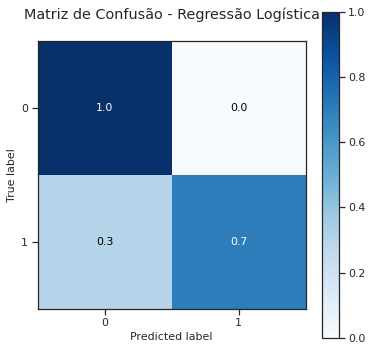

In [23]:
# imprimindo o relatório de classificação
print('\tRelatório de Classificação:\n', classification_report(y_test, y_pred, digits=4))

# imprimindo a acurácia do modelo
print('Acurácia: {:.4f}'.format(accuracy_score(y_test, y_pred)))

# imprimindo a área sob a curva ROC
print('AUC: {:.4f}\n'.format(roc_auc_score(y_test, y_pred)))

# plotando a matrix de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True, text_fontsize=11,
                                    title='Matriz de Confusão - Regressão Logística\n', figsize=(6,6), );


> O modelo de _Regressão Logística_ obteve uma acurácia de mais de 99%. **E isso é bom ou não?**

Vamos analisar os resultados com maior profundidade!

Acurácia geral do modelo foi alta, porém analisando com maior cuidado e detalhe a _Matriz de Confusão_ podemos ver que para a classe `0`, que representa as **transações normais**, o modelo consegui classificar corretamente 100% das observações. Já para classe `1`, **transações fraudulentas**, o modelo consegui classificar corretamente somente 70% das observações e, 30% foram classificadas erroneamente, ou seja, os chamados `falsos negativos`. E isso é um problema que devemos considerar, já que a capacidade do modelo de detectar **fraudes** com cartão de crédito no geral foi _pífia_.

Vamos tentar melhorar e principalmente mitigar os `falsos negativos`!

Aplicaremos técnicas de balanceamento de classes, usaremos a técnica ***Under-sampling***. E para facilitar o pré-processamento, vou usar a biblioteca `imblearn` com sua classe `imblearn.under_sampling`. E depois a biblioteca `RandomUnderSampler` e chamar o método `fit_sample(X_train, y_train)`.

❗ Note que está sendo usado o *under-sampling* no conjunto de treino, e não em todos os dados. Isso é muito importante para não desconfigurarmos a característica de teste original do *dataset*.

In [24]:
# importando a função para realizar o balanceamento das observações das classes do atributo alvo
from imblearn.under_sampling import RandomUnderSampler

In [25]:
# instanciando a função no objeto "rus_model"
rus_model = RandomUnderSampler(random_state=42)

In [26]:
# aplicando o objeto "rus_model" e com a função ".fit_resample" 
# realizando o balanceamento das observações nos dados de treino "X_train" e "y_train"
X_res, y_res = rus_model.fit_resample(X_train, y_train)

In [27]:
# visualizando as distribuições das observações nas classes
print(
    pd.Series(y_res).value_counts(),
    pd.Series(y_res).value_counts(normalize=True),
    sep='\n\n'
)

0    344
1    344
Name: Class, dtype: int64

0    0.5
1    0.5
Name: Class, dtype: float64


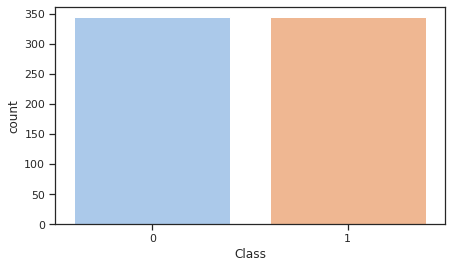

In [29]:
# plotando o gráfico de barras da distribuições das observações
plt.figure(figsize=(7,4))
sns.countplot(x=y_res);

> Agora as instâncias das classes está balanceado!

Agora novamente, iremos aplicar o modelo de _Regressão Logística_ e treiná-lo nos dados balanceados e, por fim analisar os resultados.

In [30]:
# instanciando o modelo
model_res = LogisticRegression(random_state=42)

In [31]:
# treinando o modelo com as classes balanceadas
model_res.fit(X_res, y_res)

LogisticRegression(random_state=42)

In [32]:
# realizando as predições e o cálculo das probabilidades das classes
y_pred_res = model_res.predict(X_test)
y_proba_res = model_res.predict_proba(X_test)

	Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9997    0.9575    0.9782     85295
           1     0.0338    0.8581    0.0651       148

    accuracy                         0.9573     85443
   macro avg     0.5168    0.9078    0.5216     85443
weighted avg     0.9981    0.9573    0.9766     85443

Acurácia: 0.9573
AUC: 0.9078



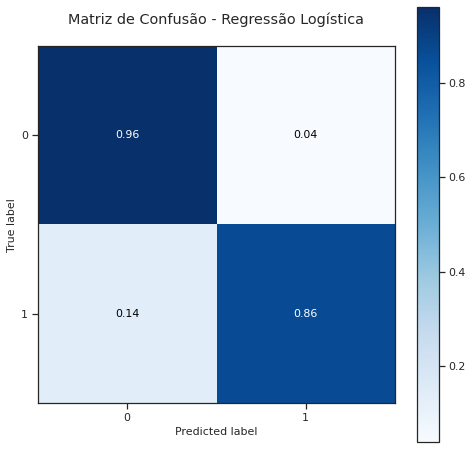

In [33]:
# imprimindo o relatório de classificação
print('\tRelatório de Classificação:\n', classification_report(y_test, y_pred_res, digits=4))

# imprimindo a acurácia do modelo
print('Acurácia: {:.4f}'.format(accuracy_score(y_test, y_pred_res)))

# imprimindo a área sob a curva ROC
print('AUC: {:.4f}\n'.format(roc_auc_score(y_test, y_pred_res)))

# plotando a matrix de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred_res, normalize=True, text_fontsize=11,
                                    title='Matriz de Confusão - Regressão Logística\n', figsize=(8,8), );

> Podemos ver que houve uma diminuição da acurácia geral do modelo, em contrapartida obtivemos um aumento significativo na capacidade do modelo em detectar fraudes. 

Apenas pelo fato de balancearmos os dados, melhoramos diversos parâmetros como `recall` e a área sob a curva (AUC), que são métricas extremamente importantes para o problema que estamos lidando.

## Vamos explorar outro exemplo

O conjunto de dados que será utilizado está disponível no repositório [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing).

Os dados estão relacionados com campanhas de marketing direto de uma instituição bancária portuguesa.

As campanhas de marketing foram baseadas em telefonemas. Frequentemente, era necessário mais de um contato para o mesmo cliente, para responder se ele aceitaria (`yes`) o termo de crédito ou não (`no`).

In [34]:
# importando o conjunto de dados de uma url
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip

--2022-02-10 22:38:06--  https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 579043 (565K) [application/x-httpd-php]
Saving to: ‘bank.zip’

bank.zip            100%[===================>] 565.47K  1.73MB/s    in 0.3s    

2022-02-10 22:38:06 (1.73 MB/s) - ‘bank.zip’ saved [579043/579043]



In [35]:
# visualizando o diretório principal
%ls

 bank.zip  'creditcard.csv?dl=1'   sample_data/


> Perceba que, o arquivo está zipado. Portanto é necessário descompactá-lo.

In [36]:
# descompactando o arquivo
!unzip '/content/bank.zip'

Archive:  /content/bank.zip
  inflating: bank-full.csv           
  inflating: bank-names.txt          
  inflating: bank.csv                


In [37]:
# visualizando novamente o diretório principal para vermos se o arquivo foi descompactado
%ls

 bank.csv        bank-names.txt  'creditcard.csv?dl=1'
 bank-full.csv   bank.zip         sample_data/


> Temos três tipos de arquivos e, para nossa atividade prática usaremos o `bank-full.csv`.

In [38]:
# visualizando o conjunto de dados
!head bank-full.csv

"age";"job";"marital";"education";"default";"balance";"housing";"loan";"contact";"day";"month";"duration";"campaign";"pdays";"previous";"poutcome";"y"
58;"management";"married";"tertiary";"no";2143;"yes";"no";"unknown";5;"may";261;1;-1;0;"unknown";"no"
44;"technician";"single";"secondary";"no";29;"yes";"no";"unknown";5;"may";151;1;-1;0;"unknown";"no"
33;"entrepreneur";"married";"secondary";"no";2;"yes";"yes";"unknown";5;"may";76;1;-1;0;"unknown";"no"
47;"blue-collar";"married";"unknown";"no";1506;"yes";"no";"unknown";5;"may";92;1;-1;0;"unknown";"no"
33;"unknown";"single";"unknown";"no";1;"no";"no";"unknown";5;"may";198;1;-1;0;"unknown";"no"
35;"management";"married";"tertiary";"no";231;"yes";"no";"unknown";5;"may";139;1;-1;0;"unknown";"no"
28;"management";"single";"tertiary";"no";447;"yes";"yes";"unknown";5;"may";217;1;-1;0;"unknown";"no"
42;"entrepreneur";"divorced";"tertiary";"yes";2;"yes";"no";"unknown";5;"may";380;1;-1;0;"unknown";"no"
58;"retired";"married";"primary";"no";121;"yes

In [39]:
# importando a biblioteca para análise e manipulação de dados
import pandas as pd

In [40]:
# instanciando o conjunto de dados no objeto "df_bank"
df_bank = pd.read_csv('bank-full.csv', sep=';')

# visualizando as 5 primeiras observações
df_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [41]:
# informações gerais do conjunto de dados
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


> Temos várias colunas classificadas como `object` e, precisamos transforma-las em colunas numéricas.

Essa preparação dos dados é muito importante para trabalhar com técnicas de _Machine Learning._

Primeiro irei realizar o tratamento do atributo `month`.

In [42]:
# tratando o atributo "month"
df_bank['month'] = pd.to_datetime(df_bank['month'], format='%b').dt.month

In [43]:
# instanciando as demais colunas de interesse para realizar a transformação para dados numéricos
cols = ['education', 'default', 'housing', 'loan', 'contact', 'poutcome', 'y']
cols

['education', 'default', 'housing', 'loan', 'contact', 'poutcome', 'y']

In [44]:
# realizando a conversão das variáveis categóricas para variáveis numéricas 
for cols in df_bank[cols]:
    df_bank[cols] = df_bank[cols].astype('category')

    # imprimindo o mapeamento
    print(cols, '\t', dict(enumerate(df_bank[cols].cat.categories)), end='\n\n')

    df_bank[cols] = df_bank[cols].cat.codes

education 	 {0: 'primary', 1: 'secondary', 2: 'tertiary', 3: 'unknown'}

default 	 {0: 'no', 1: 'yes'}

housing 	 {0: 'no', 1: 'yes'}

loan 	 {0: 'no', 1: 'yes'}

contact 	 {0: 'cellular', 1: 'telephone', 2: 'unknown'}

poutcome 	 {0: 'failure', 1: 'other', 2: 'success', 3: 'unknown'}

y 	 {0: 'no', 1: 'yes'}



In [ ]:
# # realizando a conversão das variáveis categóricas para variáveis numéricas 
# for cols in df_bank.select_dtypes(include='object').columns:
#     df_bank[cols] = df_bank[cols].astype('category')

#     # imprimindo o mapeamento
#     print(cols, '\t', dict(enumerate(df_bank[cols].cat.categories)), end='\n\n')

#     df_bank[cols] = df_bank[cols].cat.codes

In [45]:
# visualizando o conjunto de dados
df_bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,2,0,2143,1,0,2,5,5,261,1,-1,0,3,0
1,44,technician,single,1,0,29,1,0,2,5,5,151,1,-1,0,3,0
2,33,entrepreneur,married,1,0,2,1,1,2,5,5,76,1,-1,0,3,0
3,47,blue-collar,married,3,0,1506,1,0,2,5,5,92,1,-1,0,3,0
4,33,unknown,single,3,0,1,0,0,2,5,5,198,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,2,0,825,0,0,0,17,11,977,3,-1,0,3,1
45207,71,retired,divorced,0,0,1729,0,0,0,17,11,456,2,-1,0,3,1
45208,72,retired,married,1,0,5715,0,0,0,17,11,1127,5,184,3,2,1
45209,57,blue-collar,married,1,0,668,0,0,1,17,11,508,4,-1,0,3,0


In [46]:
# verificando se há valores nulos
df_bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [48]:
# se houver valores nulos, podemos com a função ".dropna()" eliminá-los
df_bank.dropna(inplace=True)

In [49]:
# com a função ".any()" temos como retorna uma resposta boleana
df_bank.isnull().sum().any()

False

In [50]:
# informações gerais
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  int8  
 4   default    45211 non-null  int8  
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  int8  
 7   loan       45211 non-null  int8  
 8   contact    45211 non-null  int8  
 9   day        45211 non-null  int64 
 10  month      45211 non-null  int64 
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  int8  
 16  y          45211 non-null  int8  
dtypes: int64(8), int8(7), object(2)
memory usage: 4.1+ MB


In [51]:
# realizando a transformação das colunas categóricas em numéricas
df_bank = pd.get_dummies(df_bank)

In [52]:
# visualizando a quantidade de colunas e seus respectivos nomes
len(df_bank.columns), df_bank.columns

(30,
 Index(['age', 'education', 'default', 'balance', 'housing', 'loan', 'contact',
        'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome',
        'y', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
        'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
        'job_services', 'job_student', 'job_technician', 'job_unemployed',
        'job_unknown', 'marital_divorced', 'marital_married', 'marital_single'],
       dtype='object'))

In [53]:
# visualizando 10 observaçẽos aleatórias do conjunto de dados
df_bank.sample(10)

,age,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single
27769,59,0,0,8,0,0,1,28,1,56,1,-1,0,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
15950,42,1,0,1406,1,0,0,22,7,178,1,-1,0,3,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
28231,41,2,0,2665,1,0,0,29,1,112,1,183,10,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
10581,46,1,0,6215,0,0,2,16,6,155,1,-1,0,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
20254,33,2,0,540,0,0,0,11,8,79,4,-1,0,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
21592,40,2,0,51,0,0,0,19,8,164,2,-1,0,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
37525,35,1,0,-255,1,0,0,13,5,196,3,265,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
44021,31,1,0,54,1,0,0,29,6,401,1,-1,0,3,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
41529,28,1,0,261,1,1,0,9,9,259,2,98,4,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
34250,28,1,0,891,0,0,1,4,5,34,6,-1,0,3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


> Para cada _observação_ dentro das colunas `job` e `maritial` foi transformada em uma coluna, se o registro existir para aquela coluna ela recebe um (1) e zero (0) para as demais colunas.

In [54]:
# visualizando a distribuição das classes
print(
    df_bank['y'].value_counts(),
    df_bank['y'].value_counts(normalize=True),
    sep='\n\n'
)

0    39922
1     5289
Name: y, dtype: int64

0    0.883015
1    0.116985
Name: y, dtype: float64


In [55]:
# importando biblioteca para visualização gráfica
import matplotlib.pyplot as plt
import seaborn as sns

# configurando o ambiente de exibição
%matplotlib inline
sns.set_theme(style='ticks', palette='pastel')

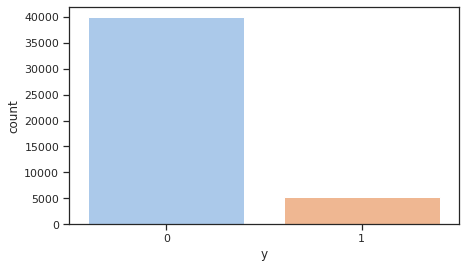

In [56]:
# gráfico de barras da distribuição das observações das classes
plt.figure(figsize=(7,4))
sns.countplot(data=df_bank, x='y');

Vamos aplicar novamente o modelo de `Regressão Logística` que representa um tipo **binomial**, pois as respostas dadas pelos clientes é **sim** ou **não**, portanto temos somente duas possivéis categórias.

De início não aplicaremos nenhum balanceamento das classes!


In [57]:
# importando a função
from sklearn.linear_model import LogisticRegression

In [58]:
# instanciando o modelo
logReg_model = LogisticRegression(random_state=42)

In [59]:
# separando as variáveis explicativas (X) e a resposta (y)
X = df_bank.drop('y', axis=1)
y = df_bank['y']

In [60]:
# importando a função para realizar o particionamento dos dados
from sklearn.model_selection import train_test_split

In [61]:
# instanciando os dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [62]:
# treinando o modelo com os dados de treino - X_train e y_train
logReg_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [63]:
# realizando as predições com o modelo após seu treinamento
y_pred = logReg_model.predict(X_test)

In [64]:
# importando as funções de métricas
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

In [65]:
# visualizando acurácia do modelo
accuracy_score(y_test, y_pred)

0.885579475081097

In [66]:
# realizando o cálculo das probabilidades e visualizando as 20 primeiras
y_proba = logReg_model.predict_proba(X_test)
y_proba[:20] * 100

array([[71.37594376, 28.62405624],
       [90.96441383,  9.03558617],
       [72.59642112, 27.40357888],
       [45.98633221, 54.01366779],
       [67.27282518, 32.72717482],
       [94.04381916,  5.95618084],
       [93.45567918,  6.54432082],
       [97.02795918,  2.97204082],
       [99.43189571,  0.56810429],
       [82.66778281, 17.33221719],
       [80.96933965, 19.03066035],
       [94.03833429,  5.96166571],
       [99.89586957,  0.10413043],
       [97.18634444,  2.81365556],
       [90.66727081,  9.33272919],
       [94.71708227,  5.28291773],
       [52.87301166, 47.12698834],
       [42.19747863, 57.80252137],
       [84.71697738, 15.28302262],
       [97.29359484,  2.70640516]])

In [67]:
# importando a biblioteca para visualização gráfica
import scikitplot as skplt

	Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.8993    0.9802    0.9380     11977
           1     0.5344    0.1714    0.2595      1587

    accuracy                         0.8856     13564
   macro avg     0.7168    0.5758    0.5988     13564
weighted avg     0.8566    0.8856    0.8586     13564

Acurácia: 0.8856
AUC: 0.5758



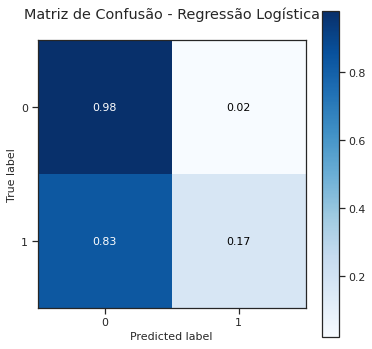

In [68]:
# imprimindo o relatório de classificação
print('\tRelatório de Classificação:\n', classification_report(y_test, y_pred, digits=4))

# imprimindo a acurácia do modelo
print('Acurácia: {:.4f}'.format(accuracy_score(y_test, y_pred)))

# imprimindo a área sob a curva ROC
print('AUC: {:.4f}\n'.format(roc_auc_score(y_test, y_pred)))

# plotando a matrix de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True, text_fontsize=11,
                                    title='Matriz de Confusão - Regressão Logística\n', figsize=(6,6), );

> Note no _Relatório de Classificação_ que o `recal`l (número de acertos) para a classe 0 é muito alta, por outro lado é bem baixa para a classe 1.

Já na _Matriz de Confusão_ podemos interpretar a classificação das observações graficamente:
- para a `classe negativa` tivemos 98% de acertos das classes e,
- já para `classe positiva` o modelo consegui classificar corretamente somente 17% das observações.
 - tivemos 83% das instâncias classificadas como **falso negativo**.

Se o desafio principal é classificar potenciais clientes que aceite o crédito, o modelo apresentou uma péssima performance!

Isso tudo se deve ao desbalanceamento das observações presentes nas classes, e só reforça o que já sabemos, nosso modelo está enviesado, ele aprendeu mais sobre a classe que tinha uma maior quantidade de observações.

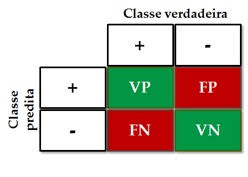

In [69]:
# criando uma tabela para exibição dos:
# VN = verdadeiro negativo      FP = falso positivo
# FN = falso negativo           VP = verdadeiro positivo

pd.crosstab(y_test, y_pred, rownames=['Real'], colnames=['Predict'], margins=True)

Predict,0,1,All
Real,,,
0,11740,237,11977
1,1315,272,1587
All,13055,509,13564


> Temos **1106** observações classificados como sendo da _classe 0_, quando na verdade eram da _classe 1_, esse tipo de erro é conhecido como `falsos negativos`.<br>
Já para os `falsos positivos`, tivemos **195** observações classificadas erroneamente como da _classe 1_ e o correto era da _classe 0_.

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     11977
           1       0.53      0.17      0.26      1587

    accuracy                           0.89     13564
   macro avg       0.72      0.58      0.60     13564
weighted avg       0.86      0.89      0.86     13564



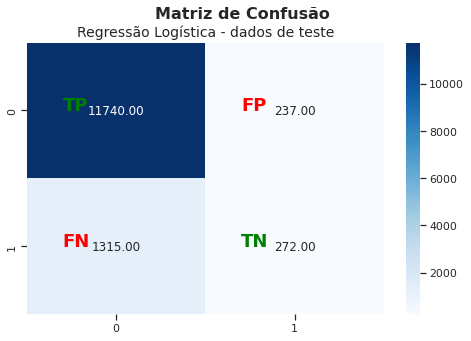

In [74]:
# imprimindo o relatório de classificação dos dados de teste do modelo
print(classification_report(y_test, y_pred))

# visualizando graficamente a matriz de confusão dos dados de teste do modelo
fig = plt.figure(figsize=[8,5])
fig.suptitle('Matriz de Confusão\n', fontsize=16, fontweight='bold')

sns.heatmap(confusion_matrix(y_test, y_pred), cmap='Blues', annot=True, fmt='.2f')
plt.title('Regressão Logística - dados de teste', fontsize=14)
plt.xticks()
plt.yticks()

plt.annotate('TP', (0.2,0.5), fontsize=18, fontweight='bold', color='green')
plt.annotate('FP', (1.2,0.5), fontsize=18, fontweight='bold', color='red')
plt.annotate('FN', (0.2,1.5), fontsize=18, fontweight='bold', color='red')
plt.annotate('TN', (1.2,1.5), fontsize=18, fontweight='bold', color='green')

# TP = True Positive (verdadeiro positivo)
# FP = False Positive (falso positivo)
# FN = False Negative (falso negativo)
# TN = True Negative (verdadeiro negativo)

plt.show();

Agora iremos realizar o balanceamento das instâncias das classes. E para isso, utilizaremos a função _NearMiss_ da biblioteca **imblearn** e o método `under_sampling`, onde ela iguala as quantidade de amostras entre as classes.



In [75]:
# importando a função
from imblearn.under_sampling import NearMiss

In [76]:
# instanciando a função no objeto "nr"
nr = NearMiss()

> Existem algums parâmetros que podem ser configurados, mas para o nosso exemplo vamos usar o padrão já definido pela função.

In [77]:
# aplicando o balanceamentos dos das observações com a função ".fit_resample()"
X, y = nr.fit_resample(X, y)

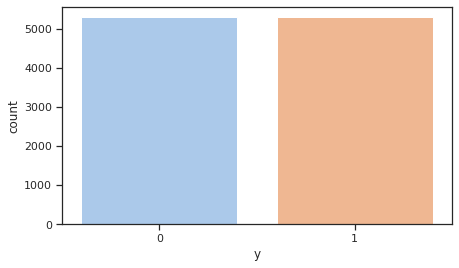

In [78]:
# gráfico de barras da distribuição das observações das classes
plt.figure(figsize=(7,4))
sns.countplot(x=y);

> Agora as observações das classes estão balanceados. Temos um pouco mais de `5000 linhas` para cada classe.

Iremos reaplicar novamente todas as etapas:
- instanciar o modelo, nesse caso a _Regressão Logística_;
- instanciar os dados de treino e teste;
- realizar o treinamento do modelo e,
- por fim, avaliar a performance do modelo utilizando as mesmas métricas utilizadas inicialmente.


In [79]:
# instanciando o modelo
logReg_model = LogisticRegression(random_state=42)

In [80]:
# instanciando os dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [81]:
# treinando o modelo com os dados de treino - X_train e y_train
logReg_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [82]:
# realizando as predições com o modelo após seu treinamento
y_pred = logReg_model.predict(X_test)

In [83]:
# visualizando acurácia do modelo
accuracy_score(y_test, y_pred)

0.8913043478260869

	Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.8692    0.9212    0.8945      1587
           1     0.9162    0.8614    0.8880      1587

    accuracy                         0.8913      3174
   macro avg     0.8927    0.8913    0.8912      3174
weighted avg     0.8927    0.8913    0.8912      3174

Acurácia: 0.8913
AUC: 0.8913



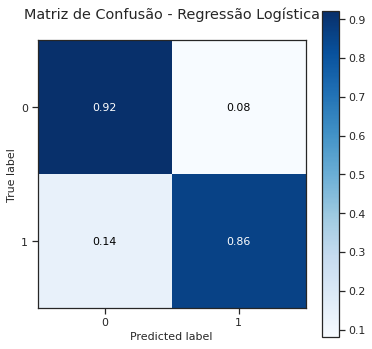

In [84]:
# imprimindo o relatório de classificação
print('\tRelatório de Classificação:\n', classification_report(y_test, y_pred, digits=4))

# imprimindo a acurácia do modelo
print('Acurácia: {:.4f}'.format(accuracy_score(y_test, y_pred)))

# imprimindo a área sob a curva
print('AUC: {:.4f}\n'.format(roc_auc_score(y_test, y_pred)))

# plotando a matrix de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True, text_fontsize=11,
                                    title='Matriz de Confusão - Regressão Logística\n', figsize=(6,6), );

> Podemos visualizar que para _classe positiva_ (1) conseguimos reduzir consideravelmente as ocorrências dos `falsos negativos`, nesse caso **14%** das observações foram classificadas erroneamente e, **86%** foram classificadas corretas, como `verdadeiros positivos`.

In [85]:
# criando uma tabela para exibição dos:
# VN = verdadeiro negativo      FP = falso positivo
# FN = falso negativo           VP = verdadeiro positivo

pd.crosstab(y_test, y_pred, rownames=['Real'], colnames=['Predict'], margins=True)

Predict,0,1,All
Real,,,
0,1462,125,1587
1,220,1367,1587
All,1682,1492,3174


Pra fim de ampliação do conhecimento, iremos também aplicar o **SMOTE (Synthetic Minority Over-sampling Technique)**

- essa função gera dados sintéticos da classe minoritária.

In [86]:
# separando as variáveis explicativas (X) e a resposta (y)
X = df_bank.drop('y', axis=1)
y = df_bank['y']

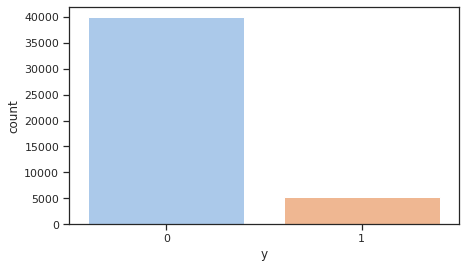

In [87]:
# gráfico de barras da distribuição das observações das classes
plt.figure(figsize=(7,4))
sns.countplot(x=y);

In [88]:
# importando a biblioteca matemática 
import numpy as np

In [89]:
# realizando a contagem das classes
np.bincount(y)

array([39922,  5289])

In [90]:
# importando a função
from imblearn.over_sampling import SMOTE

In [91]:
# instanciando a função no objeto "smt"
smt = SMOTE(random_state=42)

> Essa técnica possui o parâmetro sampling_strategy que nos permiti definir qual a porcentagem de dados sintéticos que queremos.<br>
Se definirmos 0.5 por exemplo, ele vai gerar dados sintéticos até 50% da classe majoritária. Mas a título de exemplo será usada o método padrão.

In [92]:
# aplicando o balanceamentos das observações
X, y = smt.fit_resample(X, y)

Quantidades de observações por classe
- Classe negativa [0]: 39922 
- Classe positiva [1]: 39922



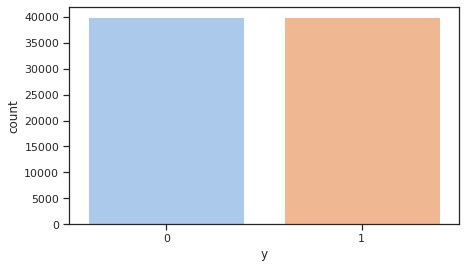

In [93]:
# gráfico de barras da distribuição das observações das classes
plt.figure(figsize=(7,4))
sns.countplot(x=y);

print(f'Quantidades de observações por classe\
\n- Classe negativa [0]: {np.bincount(y)[0]} \n- Classe positiva [1]: {np.bincount(y)[1]}\n')

In [94]:
# instanciando os dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [95]:
# instanciando o modelo
logReg_model = LogisticRegression(random_state=42)

In [96]:
# treinando o modelo com os dados de treino - X_train e y_train
logReg_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [97]:
# realizando as predições com o modelo após seu treinamento
y_pred = logReg_model.predict(X_test)

In [98]:
# visualizando acurácia do modelo
accuracy_score(y_test, y_pred)

0.7816648576438173

> Note que a acurácia caiu um pouco!

	Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.7653    0.8125    0.7882     11977
           1     0.8002    0.7509    0.7747     11977

    accuracy                         0.7817     23954
   macro avg     0.7827    0.7817    0.7815     23954
weighted avg     0.7827    0.7817    0.7815     23954

Acurácia: 0.7817
AUC: 0.7817



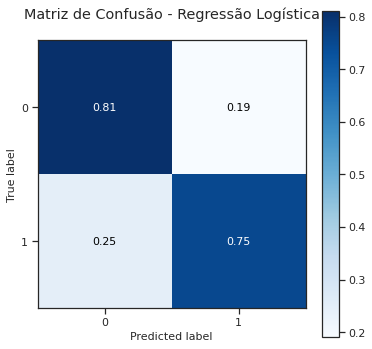

In [99]:
# imprimindo o relatório de classificação
print('\tRelatório de Classificação:\n', classification_report(y_test, y_pred, digits=4))

# imprimindo a acurácia do modelo
print('Acurácia: {:.4f}'.format(accuracy_score(y_test, y_pred)))

# imprimindo a área sob a curva
print('AUC: {:.4f}\n'.format(roc_auc_score(y_test, y_pred)))

# plotando a matrix de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True, text_fontsize=11,
                                    title='Matriz de Confusão - Regressão Logística\n', figsize=(6,6), );

> Tanto a `acurácia` e a `auc` tiveram os mesmos resultados.<br>
Porém no geral, o modelo perdeu um pouco da sua capacidade de classificação em relação a técnica utilizada anteriormente no tratamento do desbalanceamentos das classes.

In [100]:
# criando uma tabela para exibição dos:
# VN = verdadeiro negativo      FP = falso positivo
# FN = falso negativo           VP = verdadeiro positivo

pd.crosstab(y_test, y_pred, rownames=['Real'], colnames=['Predict'], margins=True)

Predict,0,1,All
Real,,,
0,9731,2246,11977
1,2984,8993,11977
All,12715,11239,23954


## Dados do `mundo real`

Os motivos que permitem que os dados sejam desbalanceados são os mais diversos. E isso é um desafio enorme para o _Cientista de Dados_ conseguir coletar igualmente dados de cada classe, ou pode ser que a amostra não reflita a população do problema em questão..

Independente dos motivos, o não tratamento do desbalanceamento afeta negativamente o desempenho do modelo, refletindo na qualidade geral do seu projeto de *Data Science*.

Não existe um método universal e ótimo. Existem técnicas que evoluem constantemente, e cabe a você identificar os prós e contras de cada uma.

Por isso, recomendo não acompanhar apenas sites como o Kaggle, mas também acompanhar *papers* e trabalhos acadêmicos que tragam pesquisas nessa área tão importante.